<h1>BoW(Bag-of-Words)-based basic QA bot trained from scratch<h1>

Using the SQuAD dataset: https://huggingface.co/datasets/rajpurkar/squad

Example queries to the QA bot:
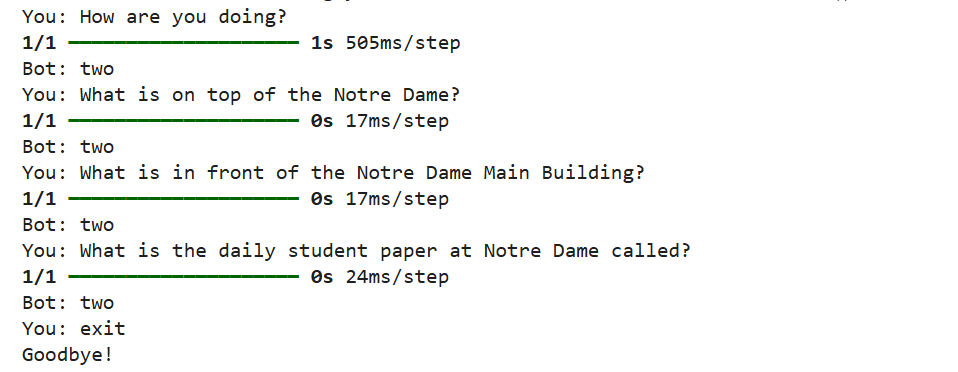

In [ ]:
pip install datasets

In [ ]:
from datasets import load_dataset

squad = load_dataset("squad", split="train")
squad = squad.shuffle(seed=42)
squad = squad.select(range(10000))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
questions_list = squad["question"]
len(questions_list)

10000

In [ ]:
answers_list = squad["answers"]

In [ ]:
answers_clean = [answer["text"][0] for answer in answers_list]
len(answers_clean)

10000

In [ ]:
import numpy as np
import tensorflow as tf
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Download required nltk resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Extract the questions and answers from the dataset
questions = questions_list
answers = answers_clean

# Tokenize and preprocess the questions
words = []
for question in questions:
    word_list = nltk.word_tokenize(question)  # Tokenizing each word in the question
    words.extend(word_list)
words = [lemmatizer.lemmatize(w.lower()) for w in words]
words = sorted(list(set(words)))  # Remove duplicates

# Prepare the training data
X_train = []
y_train = []

for i, question in enumerate(questions):
    #print("i is " + str(i))
    # Create a bag of words for each question
    word_list = nltk.word_tokenize(question)
    word_list = [lemmatizer.lemmatize(w.lower()) for w in word_list]
    bag = [0] * len(words)
    for w in word_list:
        for j, word in enumerate(words):
            if word == w:
                bag[j] = 1
    X_train.append(bag)
    y_train.append(answers[i])

X_train = np.array(X_train)

# Convert answers into a numeric representation
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

# Define the model
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(set(y_train)), activation='softmax'))  # Output layer with size of unique answers

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model
model.fit(X_train, np.array(y_train), epochs=200, batch_size=8, verbose=1)

# Function to get the chatbot response
def chatbot_response(text):
    # Convert the input into a bag of words representation
    words_input = nltk.word_tokenize(text)
    words_input = [lemmatizer.lemmatize(w.lower()) for w in words_input]
    bag = [0] * len(words)
    for w in words_input:
        for i, word in enumerate(words):
            if word == w:
                bag[i] = 1

    # Predict the response
    prediction = model.predict(np.array([bag]))[0]
    predicted_index = np.argmax(prediction)
    predicted_answer = encoder.inverse_transform([predicted_index])[0]

    return predicted_answer

# Testing the chatbot
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        print("Goodbye!")
        break
    response = chatbot_response(user_input)
    print("Bot: " + response)

Voogesituse väljund on kärbitud viimase 5000 reani.
i is 5000
i is 5001
i is 5002
i is 5003
i is 5004
i is 5005
i is 5006
i is 5007
i is 5008
i is 5009
i is 5010
i is 5011
i is 5012
i is 5013
i is 5014
i is 5015
i is 5016
i is 5017
i is 5018
i is 5019
i is 5020
i is 5021
i is 5022
i is 5023
i is 5024
i is 5025
i is 5026
i is 5027
i is 5028
i is 5029
i is 5030
i is 5031
i is 5032
i is 5033
i is 5034
i is 5035
i is 5036
i is 5037
i is 5038
i is 5039
i is 5040
i is 5041
i is 5042
i is 5043
i is 5044
i is 5045
i is 5046
i is 5047
i is 5048
i is 5049
i is 5050
i is 5051
i is 5052
i is 5053
i is 5054
i is 5055
i is 5056
i is 5057
i is 5058
i is 5059
i is 5060
i is 5061
i is 5062
i is 5063
i is 5064
i is 5065
i is 5066
i is 5067
i is 5068
i is 5069
i is 5070
i is 5071
i is 5072
i is 5073
i is 5074
i is 5075
i is 5076
i is 5077
i is 5078
i is 5079
i is 5080
i is 5081
i is 5082
i is 5083
i is 5084
i is 5085
i is 5086
i is 5087
i is 5088
i is 5089
i is 5090
i is 5091
i is 5092
i is 5093
i is 509

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 3.2351e-04 - loss: 9.5727
Epoch 2/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 4.7064e-04 - loss: 9.7444
Epoch 3/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0020 - loss: 9.5869
Epoch 4/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0027 - loss: 9.4409
Epoch 5/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0016 - loss: 9.2709
Epoch 6/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0029 - loss: 9.1845
Epoch 7/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0031 - loss: 9.1347
Epoch 8/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0016 - loss: 9.1186
Epoch 9/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0029 - loss: 9.1052
Epoch 10/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0032 - loss: 9.0929
Epoch 11/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0018 - loss: 9.0977
Epoch 12/20

You: How are you doing?
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
Bot: two
You: What is on top of the Notre Dame?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Bot: two
You: What is in front of the Notre Dame Main Building?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Bot: two
You: What is the daily student paper at Notre Dame called?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Bot: two
You: exit
Goodbye!
